In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Finding the version of libraries we are using
print("Panda version : {0}".format(pd.__version__))
print("Seaborn version : {0}".format(sns.__version__))
print("Matplotlib version : {0}".format(matplotlib.__version__))
print("Numpy version : {0}".format(np.__version__))

Panda version : 1.2.4
Seaborn version : 0.11.1
Matplotlib version : 3.4.2
Numpy version : 1.20.2


In [5]:
#To accommodate maximum number of colums in Jupyter
pd.options.display.max_columns = 20
sns.set_style('whitegrid')

In [6]:
#Reading data and perform EDA
adv_data = pd.read_csv('data/Advertising.csv')
adv_data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


<AxesSubplot:>

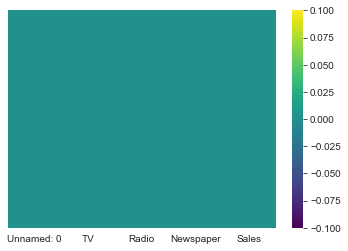

In [7]:
#Check which column has null values
sns.heatmap(adv_data.isnull(),yticklabels=False, cmap='viridis')

<AxesSubplot:xlabel='Sales', ylabel='count'>

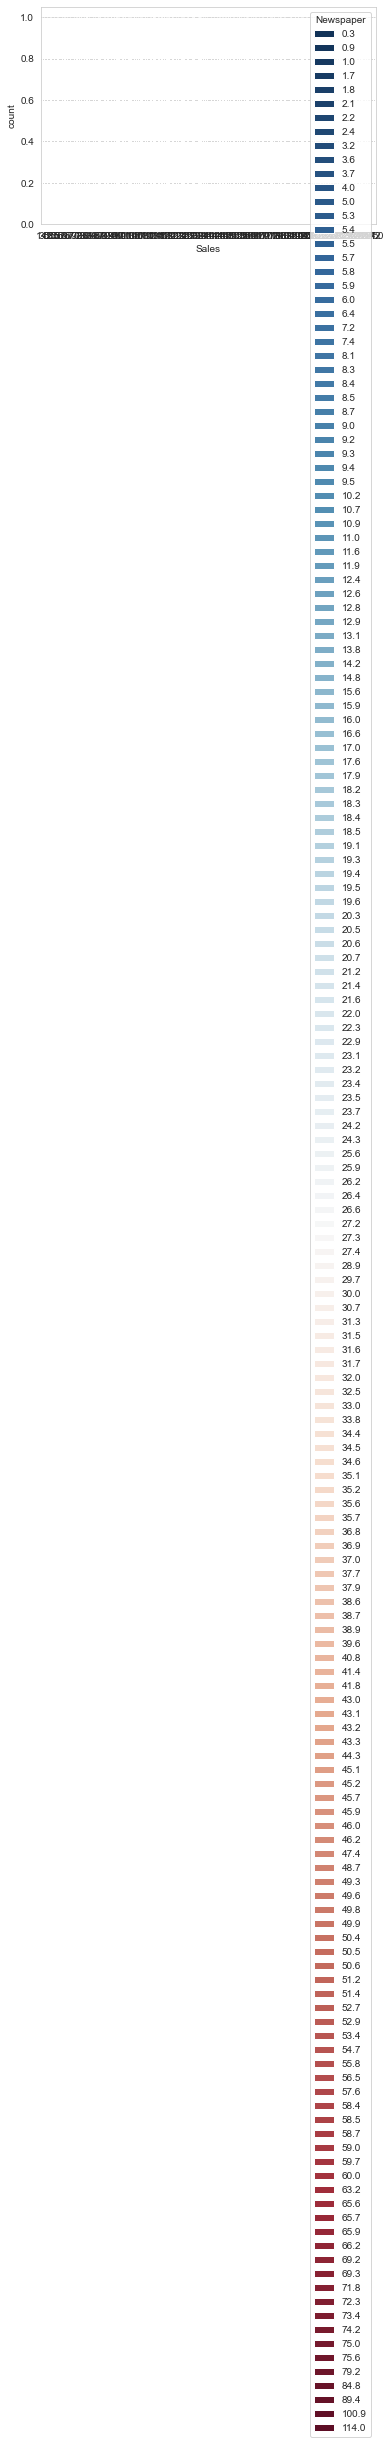

In [15]:
sns.countplot(x= 'Sales',hue='Newspaper',data = adv_data, palette = 'RdBu_r')

In [16]:
x = adv_data[["TV","Radio","Newspaper"]]
y = adv_data[["Sales"]]


In [38]:
from sklearn.model_selection import train_test_split

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.
Shape of your Data Set: (200, 5)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  4
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
  

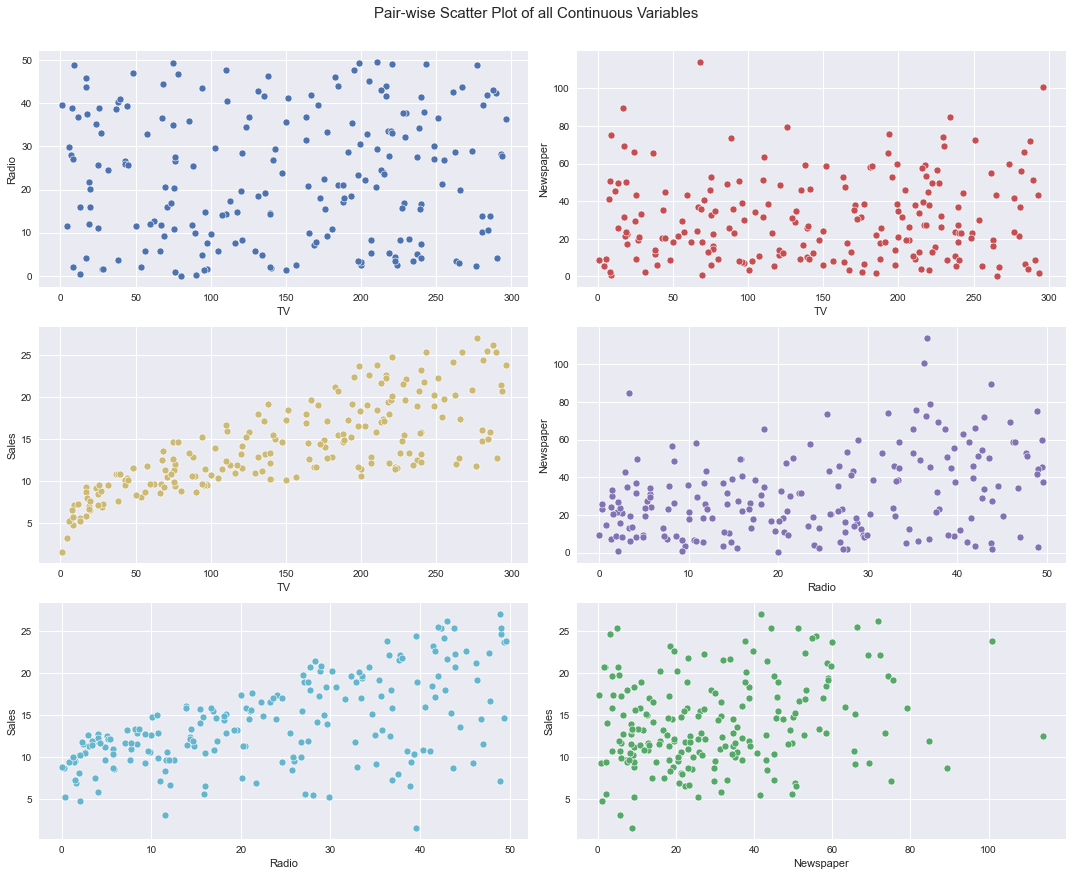

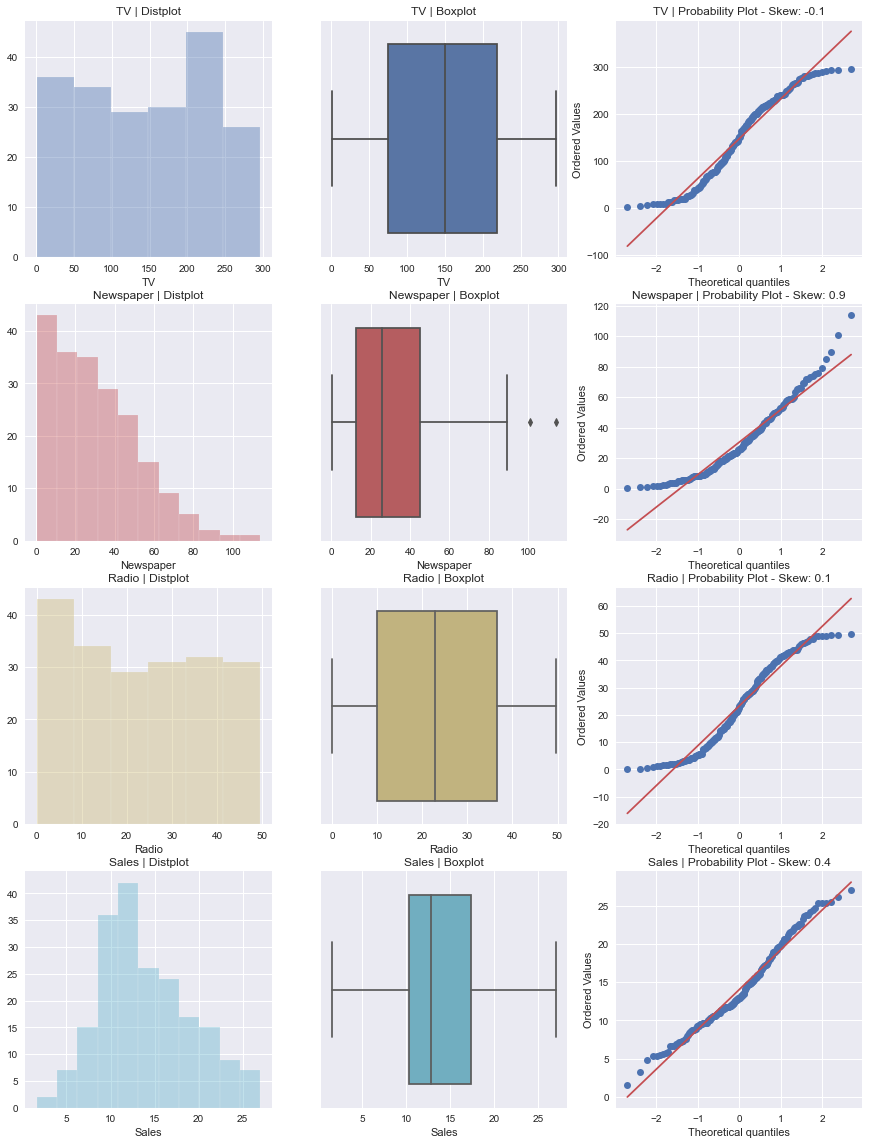

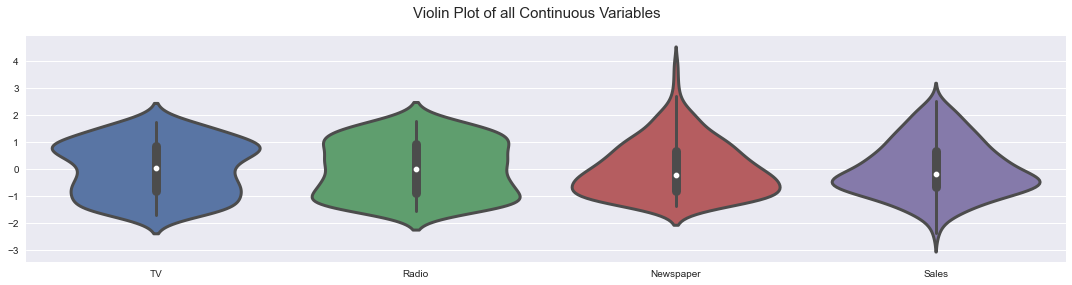

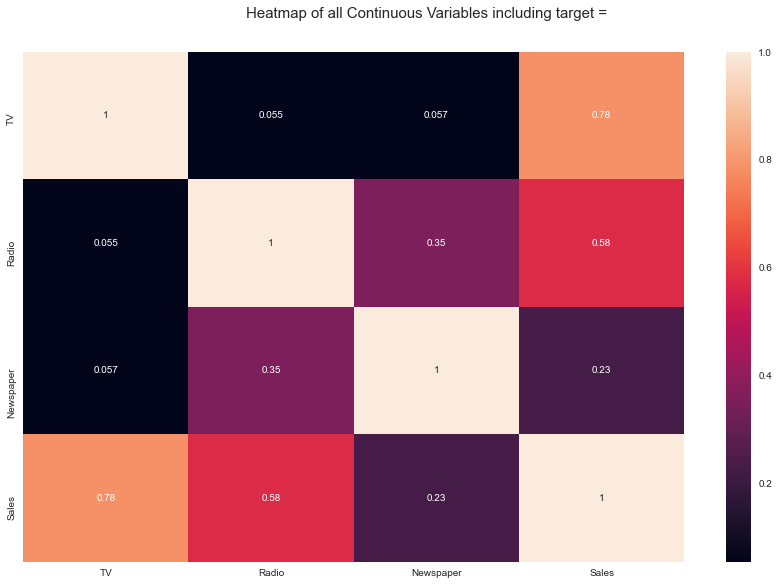

No categorical or numeric vars in data set. Hence no bar charts.
Time to run AutoViz (in seconds) = 2.976

 ###################### VISUALIZATION Completed ########################


In [17]:
adv_data.head(2)
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
df = AV.AutoViz('data/Advertising.csv')

In [19]:
#Spiliting test and train data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=1)


In [20]:
#Create Model and test with Data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [21]:
#Check accuracy of model.
model.score(x_train, y_train)

0.8959372632325174

In [22]:
model.score(x_test, y_test)


0.8927605914615383

In [54]:
from sklearn.preprocessing import PolynomialFeatures,PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import numpy as np
pipe = Pipeline((
("pt",PowerTransformer()),
("poly",PolynomialFeatures(degree=4)),
("lr", LinearRegression()),
))
pipe.fit(x_train,y_train)
print("Training R2")
print(pipe.score(x_train,y_train))
print("Testing R2")
print(pipe.score(x_test,y_test))
predicted = pipe.predict(x_test)
print("RMSE")
print(np.sqrt(mean_squared_error(predicted, y_test)))

Training R2
0.995490126160699
Testing R2
0.9974314548124075
RMSE
0.21842311226143887
